In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns

In [36]:
df=pd.read_csv('C:\\Users\\sahib pratap\\Covid-19-indicator\\Data\\Unemployment in India.csv')

Text(0, 0.5, 'Unemployment Rate(%)')

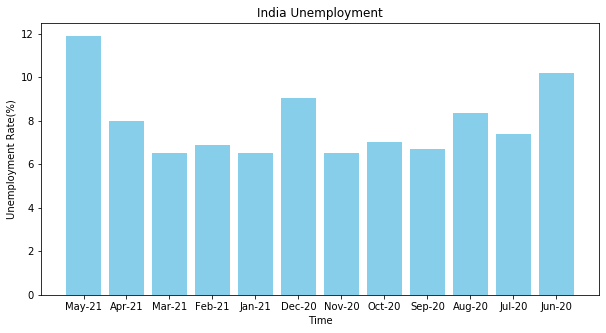

In [37]:
plt.figure(figsize=(10,5))
plt.bar(df['Month'],df['Unemployment Rate(%)'],color='skyblue')
plt.title('India Unemployment')  
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')

Text(0, 0.5, 'Unemployment Rate(%)')

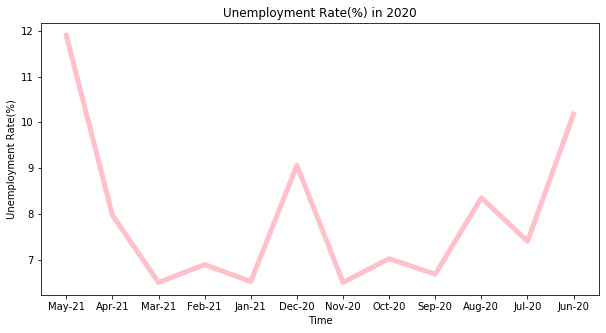

In [38]:
fig=plt.figure(figsize=(10,5))
plt.plot(df['Month'],df['Unemployment Rate(%)'],color='pink',linewidth=5)
plt.title('Unemployment Rate(%) in 2020')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')

# Collecting live data  using web scrapping

In [39]:
web_content = requests.get('https://unemploymentinindia.cmie.com/').text

In [40]:
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 2: 
        stats.append(stat)

#now convert the data into a pandas dataframe for further processing
new_cols = ["States/UT", "Percentage"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.drop(state_data.head(8).index,inplace=True)
state_data.drop(state_data.tail(8).index,inplace=True)
state_data

States/UT Percentage
8     Andhra Pradesh       13.5
9              Assam        0.1
10             Bihar       13.8
11      Chhattisgarh        8.3
12             Delhi       45.6
13               Goa       20.6
14           Gujarat        2.3
15           Haryana       29.1
16  Himachal Pradesh        7.8
17   Jammu & Kashmir       12.1
18         Jharkhand       16.0
19         Karnataka        5.3
20            Kerala       23.5
21    Madhya Pradesh        5.3
22       Maharashtra        5.7
23         Meghalaya        6.5
24            Odisha        7.0
25        Puducherry       24.0
26            Punjab        8.8
27         Rajasthan       27.6

In [41]:
state_data['Percentage']=state_data['Percentage'].map(float)

# State-wise COVID-19 unemployment in india

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text xticklabel objects>)

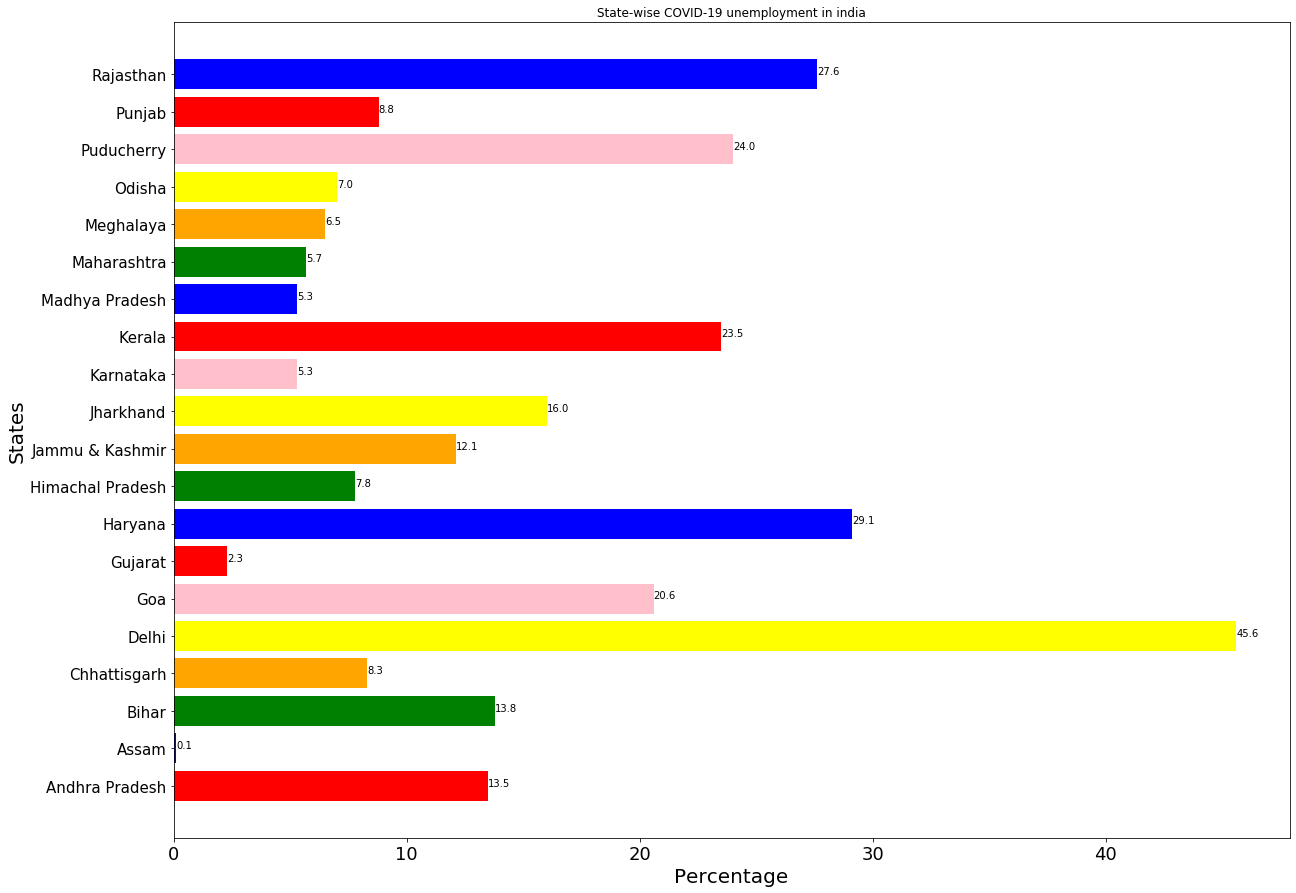

In [42]:
plt.figure(figsize=(20,15))
plt.barh(state_data['States/UT'],state_data['Percentage'],color=['red','blue','green','orange','yellow','pink'])
for index, value in enumerate(state_data['Percentage']):
    plt.text(value, index, str(value))
plt.title('State-wise COVID-19 unemployment in india')  
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('States',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)

# World unemployment in 2020

In [59]:
w_unemp=pd.read_csv('C:\\Users\\sahib pratap\\Covid-19-indicator\\Data\\unemp.csv')
w_unemp.drop(['Flag Codes'],axis=1,inplace=True)
w_unemp

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY     TIME     Value
0          AUS       HUR     TOT   PC_LF         A     1967   1.87500
1          AUS       HUR     TOT   PC_LF         A     1968   1.85000
2          AUS       HUR     TOT   PC_LF         A     1969   1.80000
3          AUS       HUR     TOT   PC_LF         A     1970   1.62500
4          AUS       HUR     TOT   PC_LF         A     1971   1.92500
...        ...       ...     ...     ...       ...      ...       ...
65562      CRI       HUR   WOMEN   PC_LF         M  2020-11  25.41643
65563      CRI       HUR   WOMEN   PC_LF         M  2020-12  24.95440
65564      CRI       HUR   WOMEN   PC_LF         M  2021-01  25.19663
65565      CRI       HUR   WOMEN   PC_LF         M  2021-02  26.33356
65566      CRI       HUR   WOMEN   PC_LF         M  2021-03  23.96560

[65567 rows x 7 columns]

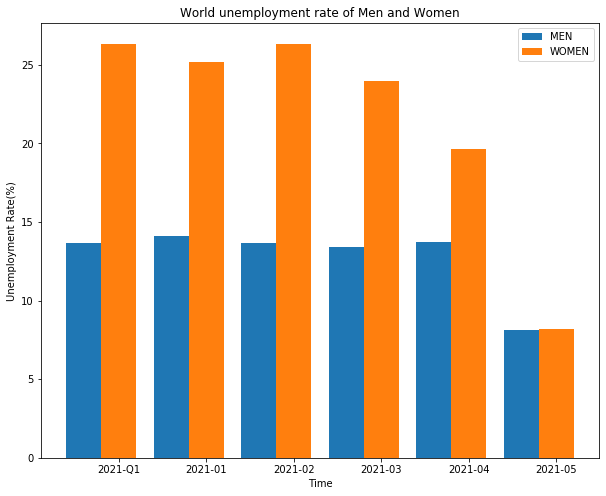

In [60]:
v_men=w_unemp[(w_unemp['SUBJECT']=='MEN') & (w_unemp['TIME']>='2021')][['TIME','Value']]
v_women=w_unemp[(w_unemp['TIME']>='2021')&(w_unemp['SUBJECT']=='WOMEN')][['TIME','Value']]
plt.figure(figsize=(10,8))
plt.bar(v_men['TIME'],v_men['Value'],width= -0.6,align='edge',label='MEN')
plt.bar(v_women['TIME'],v_women['Value'],width=0.4,label='WOMEN')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')
plt.title("World unemployment rate of Men and Women")
plt.legend()

C:\Users\sahib pratap\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'Unemployment')

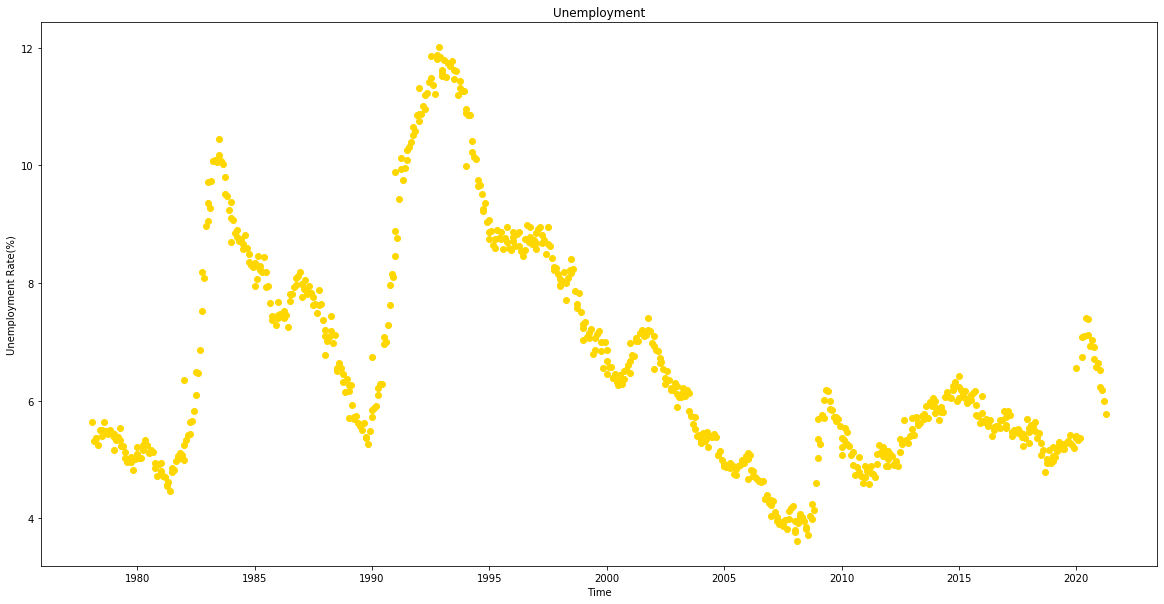

In [62]:
unemp=pd.read_csv('C:\\Users\\sahib pratap\\Covid-19-indicator\\Data\\unemp.csv')
grouped=unemp.groupby('LOCATION')
aus=grouped.get_group('AUS')
y=aus.loc[aus['SUBJECT']=='MEN']['Value']
ti=aus.loc[aus['SUBJECT']=='MEN']['TIME']
x=pd.to_datetime(ti)
plt.figure(figsize=(20,10))
plt.scatter(x,y,color='gold')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')
plt.title('Unemployment')

# World GDP

Text(0.5, 1.0, 'World GDP percentage')

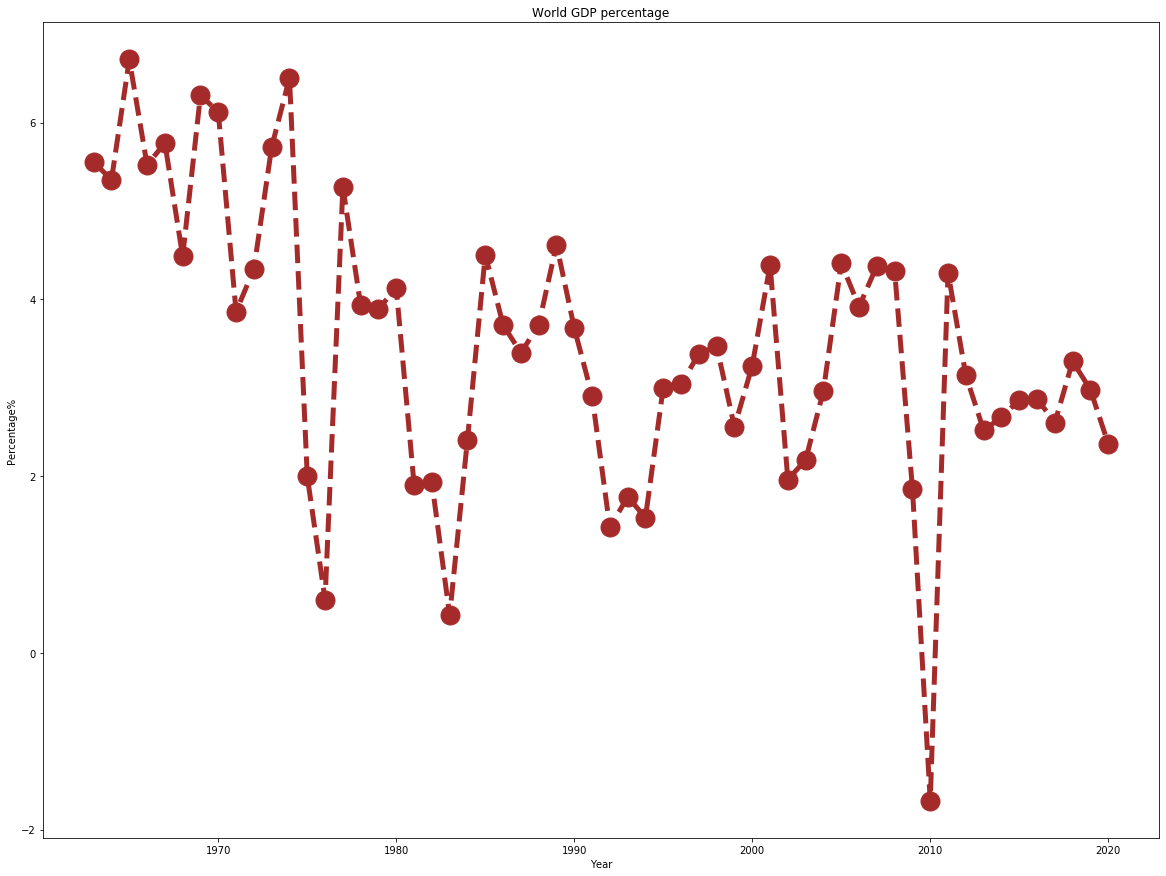

In [63]:
w_gdp = pd.read_csv('C:\\Users\\sahib pratap\\Covid-19-indicator\\Data\\world_gdp.csv')
x=pd.to_datetime(w_gdp["date"])
y=w_gdp[" GDP Growth (%)"]
plt.figure(figsize=(20,15))
plt.plot(x,y,marker='o',markersize=19,linestyle='dashed',color='brown',linewidth=5)
plt.xlabel('Year')
plt.ylabel('Percentage%')
plt.title('World GDP percentage')